In [16]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np


In [17]:
num_classes = 10
input_shape = (28, 28, 1)

# Load data and split it to train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Scale pictures (values from 0-255 to 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [18]:
model = keras.Sequential([

    # First Layer
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),

    # Second Layer
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # Third Layer
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)


batch_size = 128
epochs = 32

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.25, callbacks=[early_stopping])


Epoch 1/32
293/293 [==============================] - 9s 29ms/step - loss: 1.7292 - accuracy: 0.3690 - val_loss: 1.4472 - val_accuracy: 0.4711
Epoch 2/32
293/293 [==============================] - 8s 27ms/step - loss: 1.3845 - accuracy: 0.5019 - val_loss: 1.2567 - val_accuracy: 0.5561
Epoch 3/32
293/293 [==============================] - 8s 27ms/step - loss: 1.2268 - accuracy: 0.5651 - val_loss: 1.1864 - val_accuracy: 0.5795
Epoch 4/32
293/293 [==============================] - 8s 27ms/step - loss: 1.1371 - accuracy: 0.6004 - val_loss: 1.0336 - val_accuracy: 0.6459
Epoch 5/32
293/293 [==============================] - 8s 27ms/step - loss: 1.0619 - accuracy: 0.6305 - val_loss: 0.9952 - val_accuracy: 0.6538
Epoch 6/32
293/293 [==============================] - 8s 27ms/step - loss: 0.9936 - accuracy: 0.6515 - val_loss: 0.9319 - val_accuracy: 0.6781
Epoch 7/32
293/293 [==============================] - 8s 27ms/step - loss: 0.9498 - accuracy: 0.6703 - val_loss: 0.9069 - val_accuracy: 0.6900

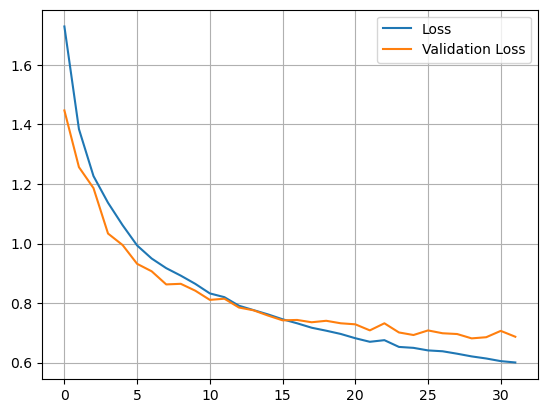

In [20]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.grid()
plt.show()


In [21]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.693140983581543
Test accuracy: 0.7663999795913696


313/313 [==============================] - 1s 4ms/step


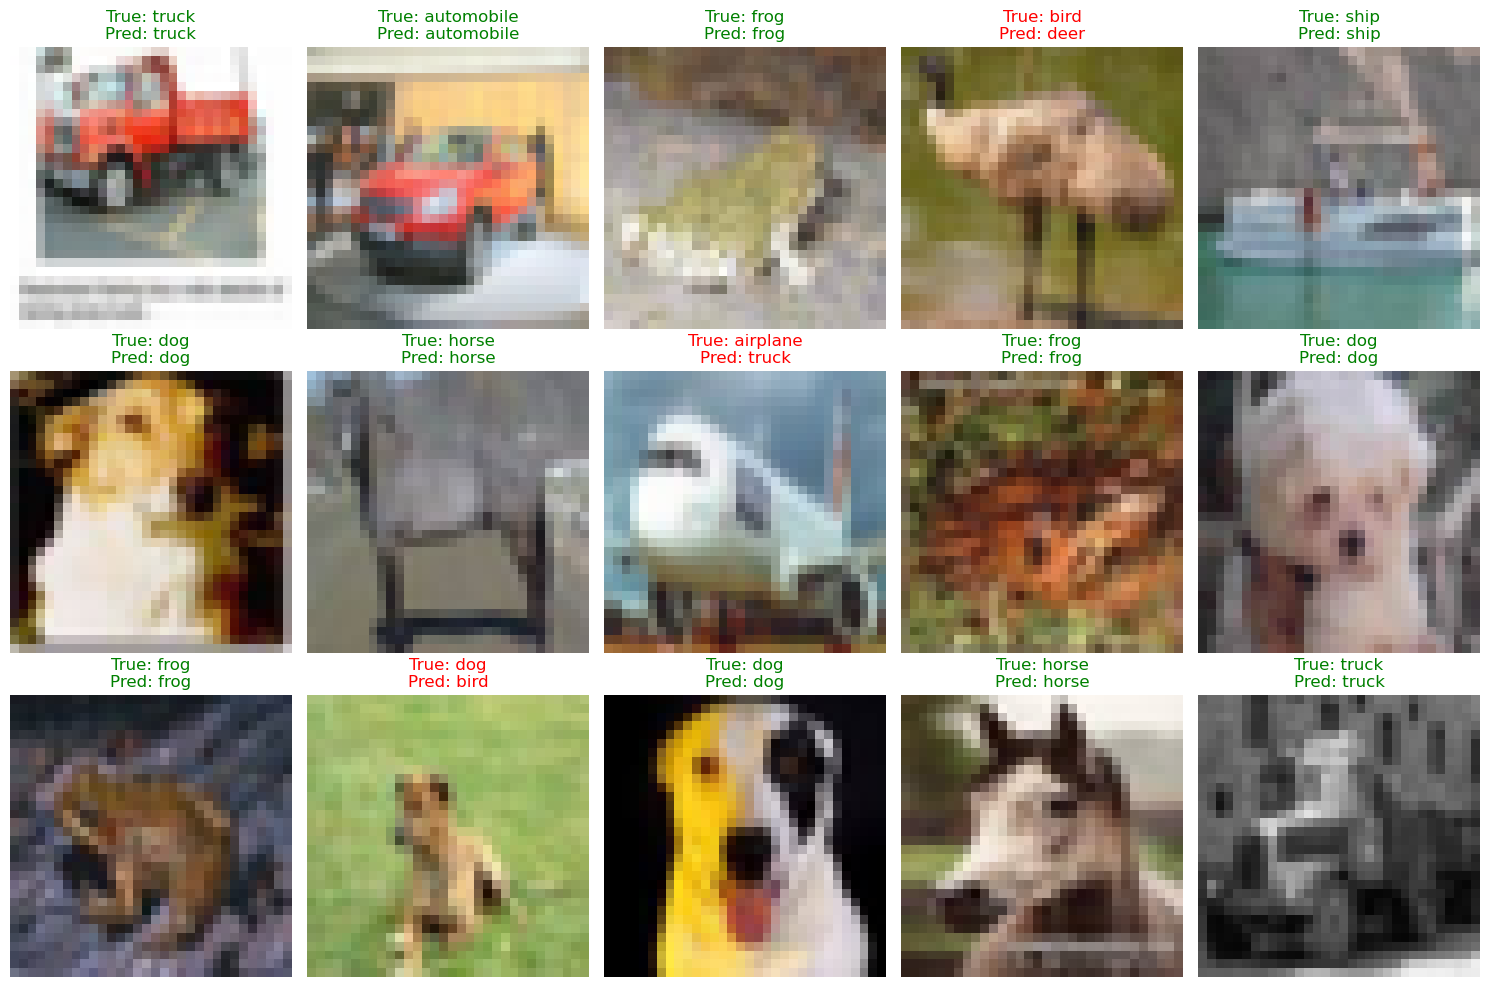

In [22]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

num_samples = 15
indices = np.random.choice(len(x_test), num_samples, replace=False)

plt.figure(figsize=(15, 10))

for i, idx in enumerate(indices):
    img = x_test[idx]

    true_label = np.argmax(y_test[idx])
    pred_label = predicted_classes[idx]

    color = 'green' if true_label == pred_label else 'red'

    plt.subplot(3, 5, i+1)
    plt.imshow(img)
    plt.title(f"True: {class_names[true_label]}\nPred: {class_names[pred_label]}",
              color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()